In [1]:
# Instalación de la librería sdv
!pip install sdv

  Obtaining dependency information for sdv from https://files.pythonhosted.org/packages/ec/ae/8c68cd3e6748f65e120a2c65914bb1a2d95b08634d3482cea8f084837d4b/sdv-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for boto3>=1.28 from https://files.pythonhosted.org/packages/5f/6a/a76adf7e28a71cc7c22376b01ffa3373b32d3e199cee3dbd86ee71e173c7/boto3-1.34.123-py3-none-any.whl.metadata
  Obtaining dependency information for botocore>=1.31 from https://files.pythonhosted.org/packages/63/2d/ebdbe38d40b18d97fb921bb6929d8e9c991eb7ae4ecc4323c40b0209d9e0/botocore-1.34.123-py3-none-any.whl.metadata
  Obtaining dependency information for graphviz>=0.13.2 from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
  Obtaining dependency information for copulas>=0.11.0 from https://files.pythonhosted.org/packages/0d/c2/366534be86ef6294fd8b75e0762037eb169962fd437afbbbd3b0248c7baa/copulas-0.11.0-py

In [18]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality

In [19]:
# 1. Generación de un dataset de ejemplo
# Crear un dataset de ejemplo con pandas
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=1000),
    'salary': np.random.randint(30000, 100000, size=1000),
    'gender': np.random.choice(['Male', 'Female'], size=1000),
    'purchase': np.random.choice(['Yes', 'No'], size=1000)
})

# Mostrar las primeras filas del dataset original
print("Dataset Original")
print(data.head())

Dataset Original
   age  salary  gender purchase
0   31   52051  Female       No
1   45   42273    Male      Yes
2   66   59789    Male      Yes
3   45   94515    Male       No
4   18   30242    Male      Yes


In [20]:
# 2. Crear metadata para el dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Mostrar la metadata generada
print("Metadata")
print(metadata.to_dict())

Metadata
{'columns': {'age': {'sdtype': 'numerical'}, 'salary': {'sdtype': 'numerical'}, 'gender': {'sdtype': 'categorical'}, 'purchase': {'sdtype': 'categorical'}}, 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}


In [21]:
# 3. Entrenamiento del modelo generador de datos sintéticos
# Inicializar el modelo CTGAN con la metadata
model = CTGANSynthesizer(metadata)

# Registrar el tiempo de inicio del entrenamiento
start_time = time.time()

# Entrenar el modelo con el dataset original
model.fit(data)

# Registrar el tiempo de finalización del entrenamiento
end_time = time.time()

# Calcular el tiempo total de entrenamiento
training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")


C:\Users\pipee\anaconda3\Lib\site-packages\sdv\single_table\base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Tiempo de entrenamiento: 27.49 segundos


In [22]:
# 4. Generación de datos sintéticos
# Registrar el tiempo de inicio de la generación de datos sintéticos
start_time = time.time()

# Generar datos sintéticos
synthetic_data = model.sample(1000)

# Registrar el tiempo de finalización de la generación de datos sintéticos
end_time = time.time()

# Calcular el tiempo total de generación
generation_time = end_time - start_time
print(f"Tiempo de generación de datos sintéticos: {generation_time:.2f} segundos")

# Mostrar las primeras filas del dataset sintético
print("Dataset Sintético")
print(synthetic_data.head())

Tiempo de generación de datos sintéticos: 0.05 segundos
Dataset Sintético
   age  salary  gender purchase
0   30   83428  Female       No
1   59   42601  Female      Yes
2   31   41062    Male       No
3   69   70253  Female      Yes
4   40   76304    Male       No


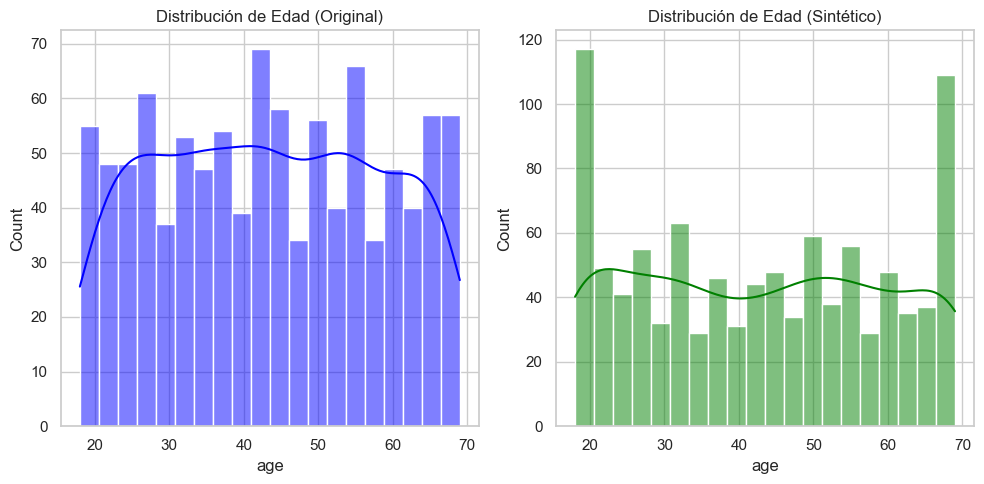

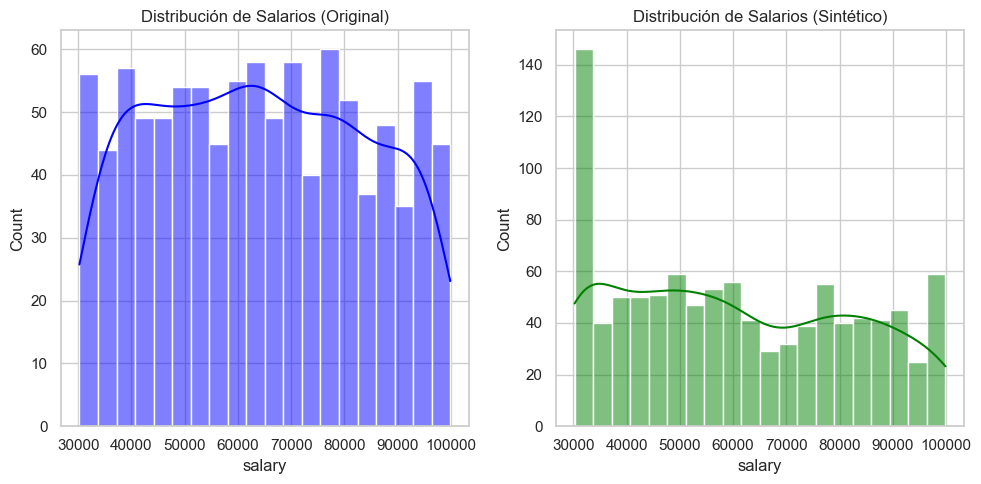

C:\Users\pipee\AppData\Local\Temp\ipykernel_18772\187275967.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='pastel')
C:\Users\pipee\AppData\Local\Temp\ipykernel_18772\187275967.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=synthetic_data, palette='pastel')


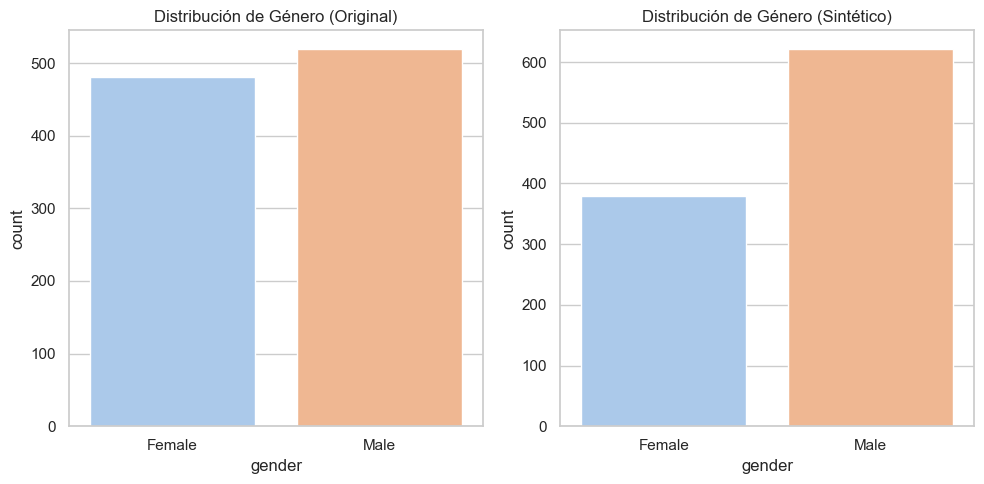

C:\Users\pipee\AppData\Local\Temp\ipykernel_18772\187275967.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=data, palette='pastel')
C:\Users\pipee\AppData\Local\Temp\ipykernel_18772\187275967.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=synthetic_data, palette='pastel')


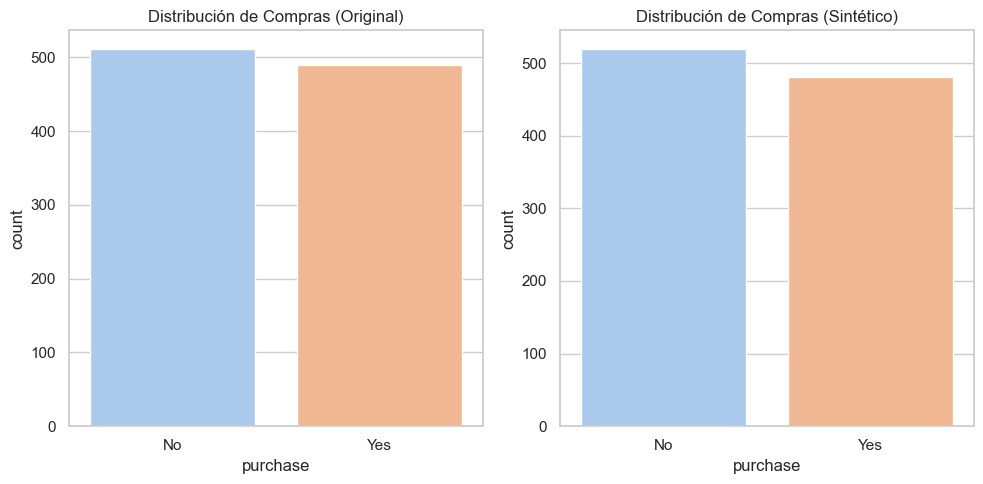

In [23]:
# 5. Visualización de los datos originales y sintéticos
# Configuración de los gráficos
sns.set(style="whitegrid")

# Visualizar la distribución de la edad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edad (Original)')

plt.subplot(1, 2, 2)
sns.histplot(synthetic_data['age'], bins=20, kde=True, color='green')
plt.title('Distribución de Edad (Sintético)')
plt.tight_layout()
plt.show()

# Visualizar la distribución de salarios
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['salary'], bins=20, kde=True, color='blue')
plt.title('Distribución de Salarios (Original)')

plt.subplot(1, 2, 2)
sns.histplot(synthetic_data['salary'], bins=20, kde=True, color='green')
plt.title('Distribución de Salarios (Sintético)')
plt.tight_layout()
plt.show()

# Visualizar la distribución de género
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=data, palette='pastel')
plt.title('Distribución de Género (Original)')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=synthetic_data, palette='pastel')
plt.title('Distribución de Género (Sintético)')
plt.tight_layout()
plt.show()

# Visualizar la distribución de compras
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='purchase', data=data, palette='pastel')
plt.title('Distribución de Compras (Original)')

plt.subplot(1, 2, 2)
sns.countplot(x='purchase', data=synthetic_data, palette='pastel')
plt.title('Distribución de Compras (Sintético)')
plt.tight_layout()
plt.show()


In [24]:
# 6. Validación de los datos sintéticos generados
# Evaluar la calidad de los datos sintéticos
evaluation_report = evaluate_quality(data, synthetic_data, metadata)
print(f"Reporte de evaluación de la calidad de los datos sintéticos:")
print(evaluation_report)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.66it/s]|
Column Shapes Score: 93.05%

(2/2) Evaluating Column Pair Trends: |██████████████████████████████████████████████████| 6/6 [00:00<00:00, 98.85it/s]|
Column Pair Trends Score: 86.78%

Overall Score (Average): 89.92%

Reporte de evaluación de la calidad de los datos sintéticos:
